# Nov 11th, 2022 (AD: co-reg)

**Motivation**: run the ANTs loop <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Dirs

In [2]:
raw_dir = '/mnt/storage/hadi/Ca-fMRI/raw'

## sub-DKI11

In [3]:
sub = 'DKI11'
files = sorted([
    f for f in os.listdir(raw_dir)
    if f"sub-{sub}" in f
])
files

[
    'sub-DKI11_ses-1_acq-FLASH_T1w.nii.gz',
    'sub-DKI11_ses-1_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_acq-FLASH_T1w.nii.gz',
    'sub-DKI11_ses-2_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

In [4]:
x = ants.image_read(pjoin(raw_dir, files[1]))
x

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81, 302)
         Spacing    : (0.2, 0.2, 0.2, 1.0)
         Origin     : (18.2, 2.8, -7.8, 0.0)
         Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [5]:
t1w = ants.image_read(pjoin(raw_dir, files[0]))
t1w

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (88, 44, 78)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (8.8, -4.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

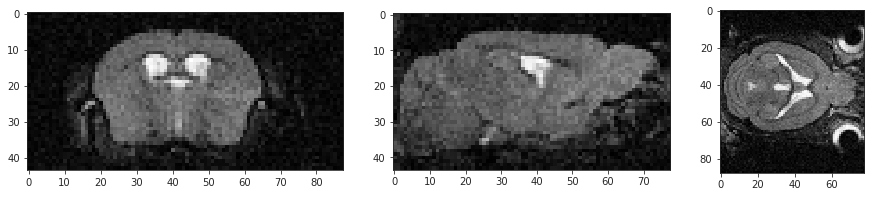

In [6]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(t1w[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(t1w[48], cmap='Greys_r')
axes[2].imshow(t1w[:, 16, :], cmap='Greys_r')
plt.show()

In [7]:
m = np.abs(x.numpy()).sum(-1) > 0
m.shape

(60, 46, 81)

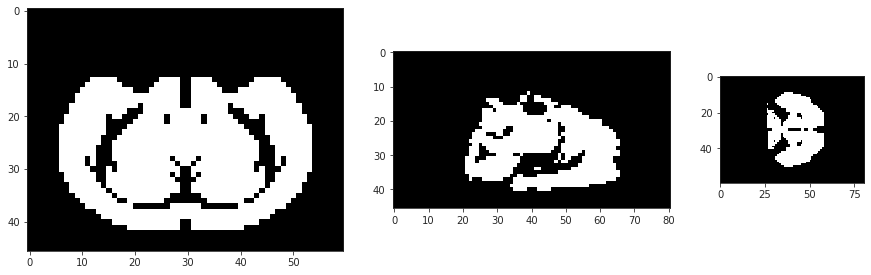

In [8]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(m[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(m[30], cmap='Greys_r')
axes[2].imshow(m[:, 16, :], cmap='Greys_r')
plt.show()

## N162

In [9]:
path = '/mnt/storage/hadi/Ca-fMRI/Hadi_AD'
path = pjoin(path, 'preprocess_outputs/bold_datasink/commonspace_resampled_template')
n162 = ants.image_read(pjoin(path, 'resampled_template.nii.gz'))
n162

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (18.2, 2.8, -7.8)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

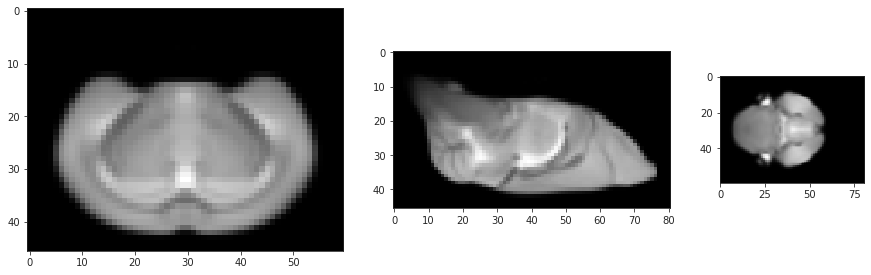

In [10]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[30], cmap='Greys_r')
axes[2].imshow(n162[:, 16, :], cmap='Greys_r')
plt.show()

## ANTs loop

In [11]:
from register.register import *
mice = Mice(512)
reg = Register(mice)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

### First plot SLC orientation

In [12]:
mice.setup_anat_data()
key = 'sub-SLC09_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, -6.2, 6.4)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

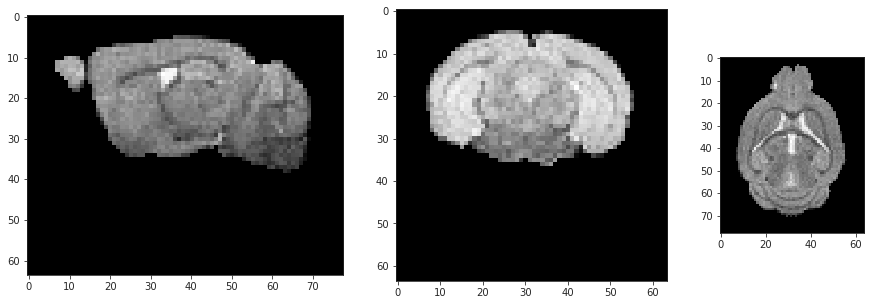

In [13]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(indiv[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(indiv[48], cmap='Greys_r')
axes[2].imshow(indiv[:, 16, :], cmap='Greys_r')
plt.show()

### Now plot new AD

In [14]:
indiv = ants.image_read(pjoin(raw_dir, files[0]))
indiv = reg._prepare(indiv)
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 44, 88)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, -4.2, 8.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

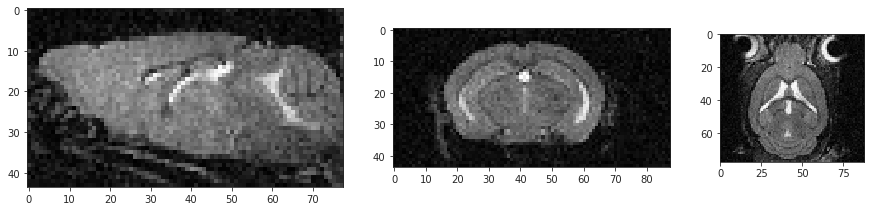

In [15]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(indiv[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(indiv[48], cmap='Greys_r')
axes[2].imshow(indiv[:, 16, :], cmap='Greys_r')
plt.show()

### Finally, N162

In [16]:
indiv = reg._prepare(n162)
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, 2.8, 18.2)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

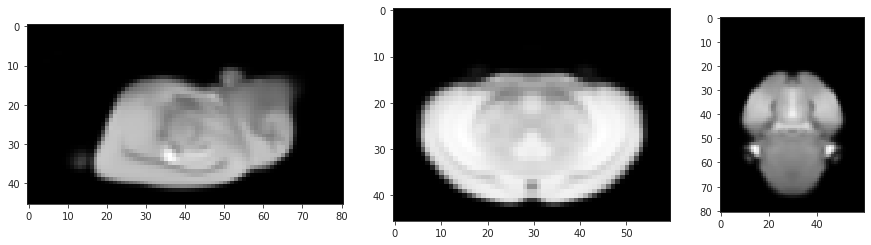

In [17]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(indiv[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(indiv[48], cmap='Greys_r')
axes[2].imshow(indiv[:, 16, :], cmap='Greys_r')
plt.show()

In [18]:
indiv = reset_ants_img(
    img=indiv[:, ::-1],
    spacing=indiv.spacing,
    origin=indiv.origin,
    dtype=indiv.dtype,
)

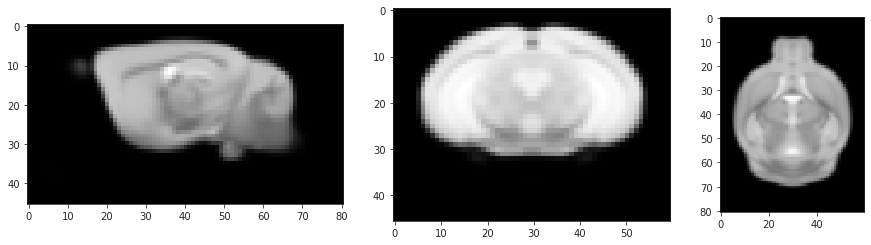

In [19]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1.14, 1, 0.52])

axes[0].imshow(indiv[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(indiv[48], cmap='Greys_r')
axes[2].imshow(indiv[:, 16, :], cmap='Greys_r')
plt.show()

## Fit ants try

In [25]:
self = reg
name = 'N162'
moving = indiv
fixed = reg.nissl

In [26]:
self.mi_base = ants.image_mutual_information(image1=fixed, image2=fixed)
self.mi_base

-1.2751097124788993

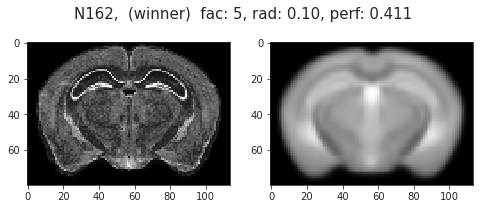

In [27]:
tx_aff, moving_aff = self._fit_aff_init(
    name=name,
    fixed=fixed,
    moving=moving,
    save_results=False,
)

In [61]:
tx = ants.registration(
    fixed=fixed,
    moving=moving_aff if
    moving_aff else moving,
    aff_metric='mattes',
    syn_metric='mattes',
    type_of_transform='SyN',
    grad_step=0.45,
    aff_sampling=16,
    aff_random_sampling_rate=0.2,
    syn_sampling=32,
    random_seed=0,
    verbose=False,
)
s = self.tx_peformance(
    fixed=fixed,
    moving=moving_aff if
    moving_aff else moving,
    moving_orig=moving if
    moving_aff else None,
    tx_aff=tx_aff,
    tx=tx,
)

In [62]:
{k: np.round(v, 3) for k, v in s.items()}

{
    'mi': 0.526,
    'ovp_MOp': 0.997,
    'sym_MOp': 0.972,
    'ovp_MOs': 1.0,
    'sym_MOs': 0.963,
    'ovp_SS': 1.0,
    'sym_SS': 0.992,
    'ovp_VISC': 1.0,
    'sym_VISC': 1.0,
    'ovp_VIS': 1.0,
    'sym_VIS': 0.982,
    'ovp_AI': 0.994,
    'sym_AI': 0.953,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 1.0,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.992,
    'ovp_CA1': 1.0,
    'sym_CA1': 0.986,
    'ovp_CLA': 1.0,
    'sym_CLA': 1.0,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.983,
    'ovp_iso': 0.999,
    'sym_iso': 0.982,
    'sym': 0.981,
    'ovp': 0.999
}

## Apply to ROIs

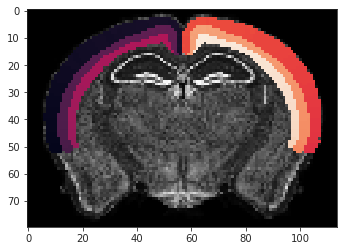

In [76]:
i = 70

plt.imshow(self.nissl[i], cmap='Greys_r')
plt.imshow(mwh(mice.parcel['cortex'][i] == 0, mice.parcel['cortex'][i]));

In [80]:
cortex = reset_ants_img(
    img=mice.parcel['cortex'],
    spacing=fixed.spacing,
    origin=fixed.origin,
    dtype='uint32',
)
cortex

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (100.0, 100.0, 100.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [113]:
roi = ants.apply_transforms(
    fixed=moving_aff,
    moving=cortex,
    transformlist=tx['invtransforms'],
    interpolator='genericLabel',
)

inv = tx_aff.invert()
roi = inv.apply_to_image(
    image=roi,
    reference=moving,
    interpolation='multilabel',
)
roi = reset_ants_img(
    img=roi[:, ::-1],
    spacing=roi.spacing,
    origin=roi.origin,
    dtype=roi.dtype,
)
roi

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, 2.8, 18.2)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [114]:
roi = self.to_lps(roi)
roi

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (18.2, 2.8, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

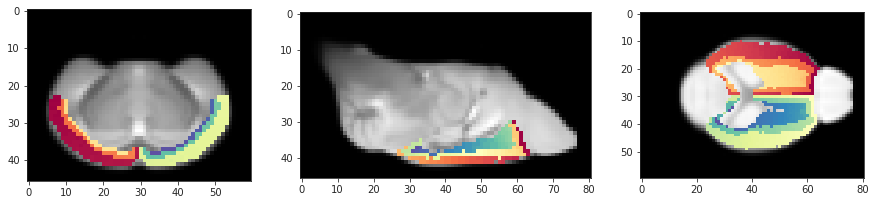

In [136]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(roi[:, :, 40].T == 0, roi[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(roi[26] == 0, roi[26]), cmap='Spectral')
axes[2].imshow(mwh(roi[:, 36, :] == 0, roi[:, 36, :]), cmap='Spectral')

plt.show()

In [133]:
_ = save_obj(roi.numpy(), 'ROI_SanDiego', tmp_dir, 'npy')

[PROGRESS] 'ROI_SanDiego.npy' saved at
/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp

## Extract data

In [138]:
sub = 'DKI11'
files = sorted([
    f for f in os.listdir(raw_dir)
    if f"sub-{sub}" in f and 'T1w' not in f
])
files

[
    'sub-DKI11_ses-1_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-1_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-1_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-2_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz',
    'sub-DKI11_ses-2_run-3_task-rest_space-common_desc-fc-mot6-wm_bold.nii.gz'
]

In [142]:
data = []
for f in files:
    data.append(ants.image_read(pjoin(raw_dir, f)).numpy())
data = np.concatenate(data, axis=-1)
data.shape

(60, 46, 81, 1812)

In [143]:
m = np.abs(data).sum(-1) > 0

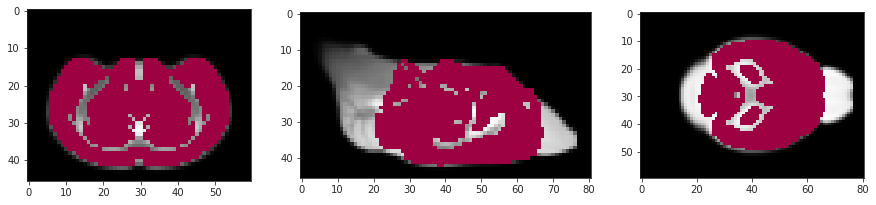

In [145]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(m[:, :, 40].T == 0, m[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(m[26] == 0, m[26]), cmap='Spectral')
axes[2].imshow(mwh(m[:, 36, :] == 0, m[:, 36, :]), cmap='Spectral')

plt.show()

### Kmeans

In [146]:
from sklearn.cluster import KMeans

In [157]:
km = KMeans(n_clusters=8, random_state=0).fit(data[m])
partition = np_nans(data.shape[:3])
partition[m] = km.labels_

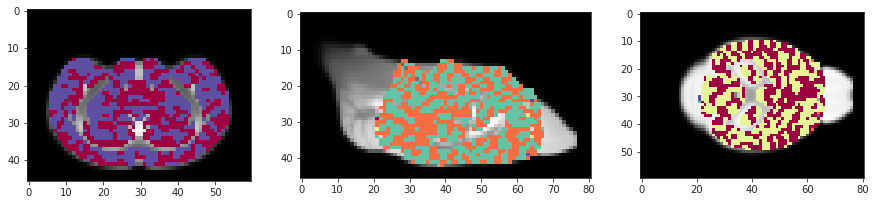

In [158]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(partition[:, :, 40].T == 0, partition[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(partition[26] == 0, partition[26]), cmap='Spectral')
axes[2].imshow(mwh(partition[:, 36, :] == 0, partition[:, 36, :]), cmap='Spectral')

plt.show()

In [165]:
lookup = np.load(
    '/home/hadi/Documents/Ca-fMRI/processed/__norm-global_parcel-columnar_n-512*3/roi_lookup.npy',
    allow_pickle=True,
).item()

In [200]:
regions = []
for n, lbl in lookup['ca2'].items():
    regions.append(mice.parcel.encode(lbl))
regions = np.array(regions)
len(regions)

542

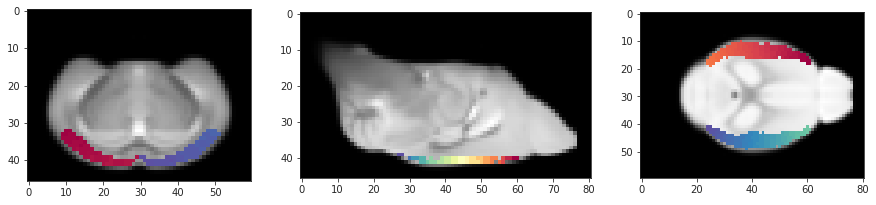

In [201]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(~np.isin(roi[:, :, 40].T, regions), roi[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(~np.isin(roi[26], regions), roi[26]), cmap='Spectral')
axes[2].imshow(mwh(~np.isin(roi[:, 36, :], regions), roi[:, 36, :]), cmap='Spectral')

plt.show()

## Xtract

In [202]:
m_ctx = np.isin(roi.numpy(), regions)
m_ctx.shape

(60, 46, 81)

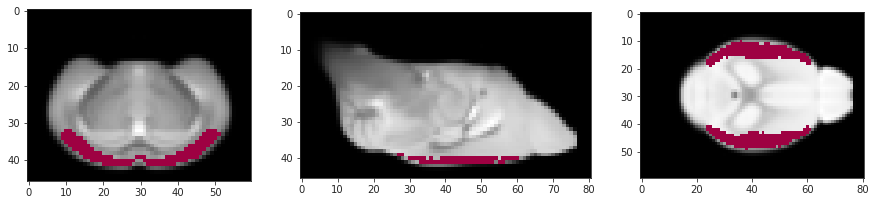

In [203]:
fig, axes = create_figure(1, 3, (15, 5), width_ratios=[1, 1.3, 1])

axes[0].imshow(n162[:, :, 40].T, cmap='Greys_r')
axes[1].imshow(n162[26], cmap='Greys_r')
axes[2].imshow(n162[:, 36, :], cmap='Greys_r')

axes[0].imshow(mwh(m_ctx[:, :, 40].T == 0, m_ctx[:, :, 40].T), cmap='Spectral')
axes[1].imshow(mwh(m_ctx[26] == 0, m_ctx[26]), cmap='Spectral')
axes[2].imshow(mwh(m_ctx[:, 36, :] == 0, m_ctx[:, 36, :]), cmap='Spectral')

plt.show()

In [210]:
x = []
for r in regions:
    x.append(np.nanmean(data[roi.numpy() == r], 0, keepdims=True))
x = np.concatenate(x)
x.shape

(542, 1812)

In [216]:
a, p = get_adj_mat(x, 'pearson', p_val=1)

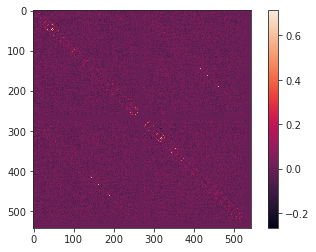

In [217]:
plt.imshow(a)
plt.colorbar();

<AxesSubplot:ylabel='Count'>

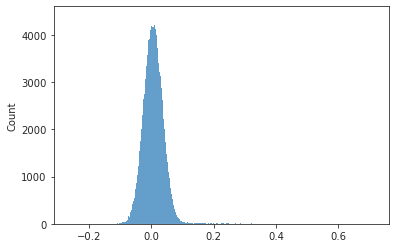

In [218]:
sns.histplot(a[a != 0])

In [223]:
km = KMeans(n_clusters=3, random_state=0).fit(a)
partition = km.labels_ + 1

In [226]:
mice = Mice(512)
bs = Base(mice, mode='ca2')

combine metadata not found, time to run cat_data() . . .

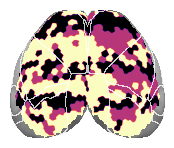

In [228]:
_ = bs.show(partition, vmin=None, vmax=None)